In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tweets.csv')
df.head()

id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0

In [3]:
df.shape

(11370, 5)

In [79]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
label          0
dtype: int64

In [4]:
df['label']=df['target'].apply(lambda x: 'Disaster' if x==1 else 'Not a Disaster')

In [5]:
df.head()

id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target           label  
0  Communal violence in Bhainsa, Telangana. "Ston...       1        Disaster  
1  Telangana: Section 144 has been imposed in Bha...       1        Disaster  
2  Arsonist sets cars ablaze at dealership https:...       1        Disaster  
3  Arsonist sets cars ablaze at dealership https:...       1        Disaster  
4  "Lord Jesus, your love brings freedom and pard...       0  Not a Disaster

In [7]:
df['label'].value_counts(normalize=True)

Not a Disaster    0.814072
Disaster          0.185928
Name: label, dtype: float64

<AxesSubplot:xlabel='label', ylabel='count'>

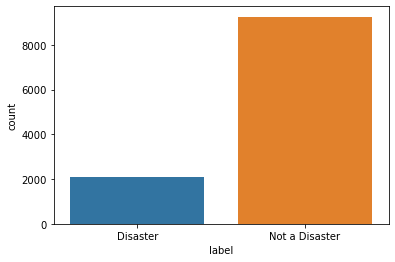

In [8]:
sns.countplot(x='label', data=df)

### Data Preparation - Split the data into train and test set

In [9]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'label'], dtype='object')

In [10]:
y = df['label']
X = df[['text']]

In [11]:
X.head()

text
0  Communal violence in Bhainsa, Telangana. "Ston...
1  Telangana: Section 144 has been imposed in Bha...
2  Arsonist sets cars ablaze at dealership https:...
3  Arsonist sets cars ablaze at dealership https:...
4  "Lord Jesus, your love brings freedom and pard...

In [18]:
y.info

<bound method Series.info of 0              Disaster
1              Disaster
2              Disaster
3              Disaster
4        Not a Disaster
              ...      
11365    Not a Disaster
11366    Not a Disaster
11367    Not a Disaster
11368    Not a Disaster
11369          Disaster
Name: label, Length: 11370, dtype: object>

In [20]:

# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.head()

text
3912   why the hell would want to join the Kenyan Cab...
5902   Citizens United wreaked havoc on our democracy...
11305  Through all the happiness and sorrow, I guess ...
3691   Remember when this cheer derailed the campaign...
11340  My first listen was also in the whip I damn ne...

In [23]:
X_test.shape

(2274, 1)

### Data Prepration - Text Preprocessing

In [24]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [25]:
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


True

In [26]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [27]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [28]:
from tqdm import tqdm, tqdm_notebook

In [29]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [31]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, ''))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 9096/9096 [00:44<00:00, 204.15it/s]


0   1
3912   hell would want join kenyan cabinet would http...  12
5902   citizen united wreaked havoc democracy democra...  12
11305  happiness sorrow guess live today tomorrow sti...  11
3691   remember cheer derailed campaign howard dean y...  13
11340           first listen also whip damn near wrecked   7

In [32]:
temp_df.columns = ['clean_text_Lem', 'text_length_Lem']

temp_df.head()

clean_text_Lem  text_length_Lem
3912   hell would want join kenyan cabinet would http...               12
5902   citizen united wreaked havoc democracy democra...               12
11305  happiness sorrow guess live today tomorrow sti...               11
3691   remember cheer derailed campaign howard dean y...               13
11340           first listen also whip damn near wrecked                7

In [33]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  
3912   hell would want join kenyan cabinet would http...               12  
5902   citizen united wreaked havoc democracy democra...               12  
11305  happiness sorrow guess live today tomorrow sti...               11  
3691   remember cheer derailed campaign howard dean y...               13  
11340           first listen also whip damn near wrecked                7

In [34]:
X_train.head()

text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  
3912   hell would want join kenyan cabinet would http...               12  
5902   citizen united wreaked havoc democracy democra...               12  
11305  happiness sorrow guess live today tomorrow sti...               11  
3691   remember cheer derailed campaign howard dean y...               13  
11340           first listen also whip damn near wrecked                7

### Creating the WordCloud for Spam Emails

In [36]:
!pip install wordcloud

In [37]:
from wordcloud import WordCloud

In [38]:
y_train

3912     Not a Disaster
5902     Not a Disaster
11305    Not a Disaster
3691     Not a Disaster
11340    Not a Disaster
              ...      
11284    Not a Disaster
5191     Not a Disaster
5390     Not a Disaster
860      Not a Disaster
7270     Not a Disaster
Name: label, Length: 9096, dtype: object

In [39]:
Disaster_df = X_train.loc[y_train=='Disaster', :]

Disaster_df.head()

text  \
167   Yup, and the US once shot down an Iranian airp...   
6271  Due to the increasing levels of nitrogen dioxi...   
6765  🔴Warning Repressive forces of the Islamic Repu...   
1886  Come on - the country is burning. Over a billi...   
8395  As for rapes: https://t.co/0sTjx2AneH Also, my...   

                                         clean_text_Lem  text_length_Lem  
167   yup u shot iranian airplane accident supp http...               11  
6271  due increasing level nitrogen dioxide caused t...               13  
6765  warning repressive force islamic republic fire...               12  
1886  come country burning billion animal dead someh...               10  
8395  rape http co stjx aneh also grandfather livest...               13

In [40]:
words = ' '.join(Disaster_df['clean_text_Lem'])

print(words[:100])

yup u shot iranian airplane accident supp http co smtor tsjn due increasing level nitrogen dioxide c


In [42]:
Disaster_df = X_train.loc[y_train=='Disaster', :]

words = ' '.join(Disaster_df['clean_text_Lem'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'http' not in word])

In [43]:
Disaster_df_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

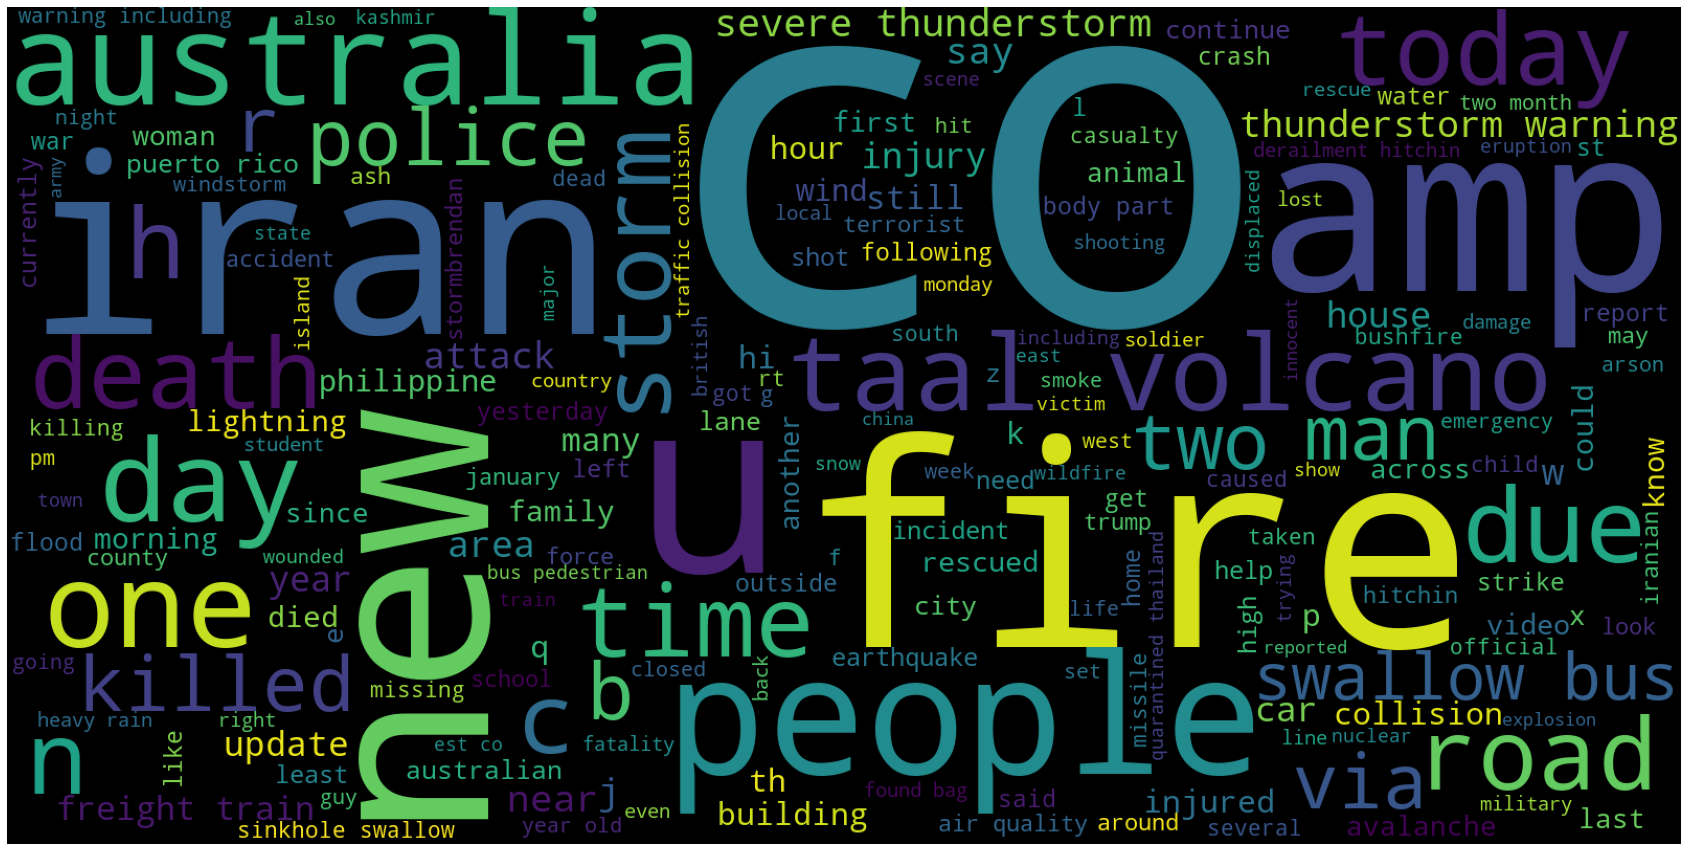

In [44]:
plt.figure(1,figsize=(30,20))
plt.imshow(Disaster_df_wordcloud)
plt.axis('off')
plt.show()

In [45]:
X_train.head()

text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  
3912   hell would want join kenyan cabinet would http...               12  
5902   citizen united wreaked havoc democracy democra...               12  
11305  happiness sorrow guess live today tomorrow sti...               11  
3691   remember cheer derailed campaign howard dean y...               13  
11340           first listen also whip damn near wrecked                7

In [46]:
! pip install --upgrade gensim

  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2


In [47]:
import gensim

print(gensim.__version__)

4.2.0


In [48]:
from gensim.models import Word2Vec

In [49]:
X_train['tokenised_sentences'] = X_train.clean_text_Lem.apply(lambda sent : sent.split())

X_train.head()

text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  \
3912   hell would want join kenyan cabinet would http...               12   
5902   citizen united wreaked havoc democracy democra...               12   
11305  happiness sorrow guess live today tomorrow sti...               11   
3691   remember cheer derailed campaign howard dean y...               13   
11340           first listen also whip damn near wrecked                7   

                                     tokenised_sentences  
3912   [hell, would, want, join, kenyan, cabinet, wou...  
5902   [citizen, united, wreaked, havoc, democracy, d...  
11305  [happiness, sorrow, guess, live, today, tomorr...  
3691   [remember, cheer, derailed, campaign, howard, ...  
11340   [first, listen, also, whip, damn, near, wrecked]

In [96]:
# determining the name of the file
file_name = 'TrainData.xlsx'
  
# saving the excel
X_train.to_excel(file_name)

In [86]:
# train model

model = Word2Vec(list(X_train.tokenised_sentences), vector_size=300, min_count=1)

In [87]:
print(model)

Word2Vec<vocab=22114, vector_size=300, alpha=0.025>


In [88]:
model.corpus_count


9096

In [89]:
print(model.wv.key_to_index)


{'http': 0, 'co': 1, 'amp': 2, 'u': 3, 'people': 4, 'like': 5, 'fire': 6, 'one': 7, 'get': 8, 'year': 9, 'time': 10, 'need': 11, 'day': 12, 'would': 13, 'new': 14, 'know': 15, 'iran': 16, 'say': 17, 'b': 18, 'c': 19, 'first': 20, 'storm': 21, 'think': 22, 'see': 23, 'today': 24, 'trump': 25, 'w': 26, 'want': 27, 'two': 28, 'death': 29, 'back': 30, 'h': 31, 'go': 32, 'n': 33, 'man': 34, 'let': 35, 'still': 36, 'world': 37, 'emergency': 38, 'australia': 39, 'r': 40, 'x': 41, 'news': 42, 'f': 43, 'make': 44, 'p': 45, 'v': 46, 'j': 47, 'body': 48, 'many': 49, 'said': 50, 'good': 51, 'help': 52, 'attack': 53, 'got': 54, 'th': 55, 'right': 56, 'could': 57, 'e': 58, 'nuclear': 59, 'last': 60, 'l': 61, 'woman': 62, 'please': 63, 'also': 64, 'really': 65, 'k': 66, 'take': 67, 'come': 68, 'much': 69, 'volcano': 70, 'even': 71, 'killed': 72, 'look': 73, 'home': 74, 'love': 75, 'life': 76, 'g': 77, 'never': 78, 'bomb': 79, 'going': 80, 'taal': 81, 'way': 82, 'service': 83, 'state': 84, 'police': 8

In [90]:
print(model.wv.index_to_key)

['http', 'co', 'amp', 'u', 'people', 'like', 'fire', 'one', 'get', 'year', 'time', 'need', 'day', 'would', 'new', 'know', 'iran', 'say', 'b', 'c', 'first', 'storm', 'think', 'see', 'today', 'trump', 'w', 'want', 'two', 'death', 'back', 'h', 'go', 'n', 'man', 'let', 'still', 'world', 'emergency', 'australia', 'r', 'x', 'news', 'f', 'make', 'p', 'v', 'j', 'body', 'many', 'said', 'good', 'help', 'attack', 'got', 'th', 'right', 'could', 'e', 'nuclear', 'last', 'l', 'woman', 'please', 'also', 'really', 'k', 'take', 'come', 'much', 'volcano', 'even', 'killed', 'look', 'home', 'love', 'life', 'g', 'never', 'bomb', 'going', 'taal', 'way', 'service', 'state', 'police', 'another', 'house', 'bag', 'since', 'disaster', 'war', 'country', 'z', 'train', 'air', 'building', 'due', 'flood', 'mass', 'video', 'thing', 'suicide', 'every', 'show', 'dead', 'part', 'well', 'climate', 'hit', 'heart', 'injury', 'army', 'cause', 'around', 'burning', 'work', 'road', 'put', 'someone', 'feel', 'terrorist', 'may', '

In [91]:
#Checking the shape of vectors learned by model
print(model.wv.__getitem__(model.wv.index_to_key).shape)

(22114, 300)


In [99]:
#1500 Dropping the row which has empty list of tokens other wise it gives error
X_train = X_train.drop(1500)

In [100]:

def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [101]:

X_train['doc_vector'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|█████████████████████████████████████████████████████████████████████████████| 9095/9095 [00:10<00:00, 850.09it/s]


In [94]:
def document_vector(doc, keyed_vectors):
  """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
  try:
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)
  except:
    print(doc, vocab_tokens)
    raise ValueError()

In [95]:
X_train['doc_vector'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

 85%|█████████████████████████████████████████████████████████████████▎           | 7719/9096 [00:10<00:01, 743.22it/s]


[] []


ValueError: 

In [102]:

X_train.head()

text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  \
3912   hell would want join kenyan cabinet would http...               12   
5902   citizen united wreaked havoc democracy democra...               12   
11305  happiness sorrow guess live today tomorrow sti...               11   
3691   remember cheer derailed campaign howard dean y...               13   
11340           first listen also whip damn near wrecked                7   

                                     tokenised_sentences  \
3912   [hell, would, want, join, kenyan, cabinet, wou...   
5902   [citizen, united, wreaked, havoc, democracy, d...   
11305  [happiness, sorrow, guess, live, today, tomorr...   
3691   [remember, cheer, derailed, campaign, howard, ...   
11340   [first, listen, also, whip, damn, near, wrecked]   

                                              doc_vector  
3912   [-0.08185786, 0.3227417, 0.08840885, 0.1419702...  
5902   [-0.019616665, 0.07737774, 0.02159255, 0.03489...  
11305  [-0.073918514, 0.29342476, 0.081662096, 0.1310...  
3691   [-0.06734376, 0.26916185, 0.07418192, 0.118215...  
11340  [-0.049145818, 0.19705847, 0.055313203, 0.0874...

In [70]:

with pd.option_context('display.max_rows', None,):
   print(X_train.tokenised_sentences)

3912     [hell, would, want, join, kenyan, cabinet, wou...
5902     [citizen, united, wreaked, havoc, democracy, d...
11305    [happiness, sorrow, guess, live, today, tomorr...
3691     [remember, cheer, derailed, campaign, howard, ...
11340     [first, listen, also, whip, damn, near, wrecked]
8862             [never, stop, vocal, http, co, hlrp, muh]
2995     [http, co, zpqgiv, p, someone, bit, reach, ret...
10819    [elected, manufactured, crisis, actor, anti, a...
167      [yup, u, shot, iranian, airplane, accident, su...
1915     [listen, expert, australia, burning, ridiculou...
10142    [mad, max, beyond, thunder, dune, dakar, http,...
3487                              [need, shit, demolished]
2464     [life, naturally, involves, conflicting, inter...
4667                                   [dont, electrocute]
10618    [coverage, start, hxchallenge, last, week, fir...
801      [push, mass, vaccination, point, toward, stage...
2138     [isitok, say, p, scott, morrison, response, ca.

In [103]:
X_train.head()

text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  \
3912   hell would want join kenyan cabinet would http...               12   
5902   citizen united wreaked havoc democracy democra...               12   
11305  happiness sorrow guess live today tomorrow sti...               11   
3691   remember cheer derailed campaign howard dean y...               13   
11340           first listen also whip damn near wrecked                7   

                                     tokenised_sentences  \
3912   [hell, would, want, join, kenyan, cabinet, wou...   
5902   [citizen, united, wreaked, havoc, democracy, d...   
11305  [happiness, sorrow, guess, live, today, tomorr...   
3691   [remember, cheer, derailed, campaign, howard, ...   
11340   [first, listen, also, whip, damn, near, wrecked]   

                                              doc_vector  
3912   [-0.08185786, 0.3227417, 0.08840885, 0.1419702...  
5902   [-0.019616665, 0.07737774, 0.02159255, 0.03489...  
11305  [-0.073918514, 0.29342476, 0.081662096, 0.1310...  
3691   [-0.06734376, 0.26916185, 0.07418192, 0.118215...  
11340  [-0.049145818, 0.19705847, 0.055313203, 0.0874...

In [104]:
X_train_w2v = list(X_train.doc_vector)

In [105]:
X_train_w2v

[array([-0.08185786,  0.3227417 ,  0.08840885,  0.14197022,  0.01409072,
        -0.33220252,  0.31576407,  0.75188106,  0.13723025, -0.16535285,
         0.03993571, -0.23312509,  0.05454976,  0.00988028, -0.15459664,
        -0.1681366 ,  0.14548443,  0.01997965,  0.06851666, -0.02321672,
        -0.08961887, -0.07923383,  0.24625115,  0.07449517,  0.16222571,
         0.08631212, -0.22863644, -0.03170962, -0.09092402, -0.25619778,
         0.1733544 , -0.2536486 , -0.07047026, -0.13078083, -0.09838919,
         0.0596419 ,  0.09847536, -0.29866955, -0.0261925 , -0.02504446,
        -0.08877821,  0.03071636,  0.04227291, -0.13616844,  0.15952417,
         0.24866466, -0.03624762,  0.15524782, -0.06248862,  0.3503571 ,
        -0.0292473 ,  0.01018284, -0.4131486 , -0.04535085, -0.11870604,
         0.26694456,  0.19996846,  0.08673135,  0.12088016,  0.0339153 ,
        -0.09901491, -0.12696998,  0.06873523,  0.0065316 ,  0.14524783,
        -0.01317837, -0.13463257,  0.13000976, -0.2

### Preprocessing the Test Data

In [106]:
X_test.head()

text
3495   How many illegal buildings should be demolishe...
5461                     Who’s fatality is this tho ????
9794   #OnThisDay 2018 Chinese state media confirmed ...
11105  With any luck you will miss the windstorm on e...
1803   Inferno on Black Friday 1939: 71 deaths, 3,700...

In [107]:

temp_df = X_test['text'].progress_apply(lambda x: preprocess(x, ''))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 2274/2274 [00:17<00:00, 128.15it/s]


0   1
3495   many illegal building demolished city guadalaj...  13
5461                                        fatality tho   2
9794   onthisday chinese state medium confirmed irani...  14
11105       luck miss windstorm either side fly safe xxx   8
1803   inferno black friday death building much fuel ...  15

In [108]:
temp_df.columns = ['clean_text_Lem', 'text_length_Lem']

temp_df.head()

clean_text_Lem  text_length_Lem
3495   many illegal building demolished city guadalaj...               13
5461                                        fatality tho                2
9794   onthisday chinese state medium confirmed irani...               14
11105       luck miss windstorm either side fly safe xxx                8
1803   inferno black friday death building much fuel ...               15

In [109]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

text  \
3495   How many illegal buildings should be demolishe...   
5461                     Who’s fatality is this tho ????   
9794   #OnThisDay 2018 Chinese state media confirmed ...   
11105  With any luck you will miss the windstorm on e...   
1803   Inferno on Black Friday 1939: 71 deaths, 3,700...   

                                          clean_text_Lem  text_length_Lem  
3495   many illegal building demolished city guadalaj...               13  
5461                                        fatality tho                2  
9794   onthisday chinese state medium confirmed irani...               14  
11105       luck miss windstorm either side fly safe xxx                8  
1803   inferno black friday death building much fuel ...               15

In [110]:
X_test['tokenised_sentences'] = X_test.clean_text_Lem.apply(lambda sent : sent.split())

X_test.head()

text  \
3495   How many illegal buildings should be demolishe...   
5461                     Who’s fatality is this tho ????   
9794   #OnThisDay 2018 Chinese state media confirmed ...   
11105  With any luck you will miss the windstorm on e...   
1803   Inferno on Black Friday 1939: 71 deaths, 3,700...   

                                          clean_text_Lem  text_length_Lem  \
3495   many illegal building demolished city guadalaj...               13   
5461                                        fatality tho                2   
9794   onthisday chinese state medium confirmed irani...               14   
11105       luck miss windstorm either side fly safe xxx                8   
1803   inferno black friday death building much fuel ...               15   

                                     tokenised_sentences  
3495   [many, illegal, building, demolished, city, gu...  
5461                                     [fatality, tho]  
9794   [onthisday, chinese, state, medium, confirmed,...  
11105  [luck, miss, windstorm, either, side, fly, saf...  
1803   [inferno, black, friday, death, building, much...

In [112]:
# determining the name of the file
file_name = 'TestData.xlsx'
  
# saving the excel
X_test.to_excel(file_name)

In [113]:
#10862 Dropping the row which has empty list of tokens other wise it gives error
X_test = X_test.drop(10862)

In [114]:
X_test['doc_vector'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|█████████████████████████████████████████████████████████████████████████████| 2273/2273 [00:04<00:00, 504.80it/s]


In [115]:
X_test.head()

text  \
3495   How many illegal buildings should be demolishe...   
5461                     Who’s fatality is this tho ????   
9794   #OnThisDay 2018 Chinese state media confirmed ...   
11105  With any luck you will miss the windstorm on e...   
1803   Inferno on Black Friday 1939: 71 deaths, 3,700...   

                                          clean_text_Lem  text_length_Lem  \
3495   many illegal building demolished city guadalaj...               13   
5461                                        fatality tho                2   
9794   onthisday chinese state medium confirmed irani...               14   
11105       luck miss windstorm either side fly safe xxx                8   
1803   inferno black friday death building much fuel ...               15   

                                     tokenised_sentences  \
3495   [many, illegal, building, demolished, city, gu...   
5461                                     [fatality, tho]   
9794   [onthisday, chinese, state, medium, confirmed,...   
11105  [luck, miss, windstorm, either, side, fly, saf...   
1803   [inferno, black, friday, death, building, much...   

                                              doc_vector  
3495   [-0.07980154, 0.31201962, 0.08575715, 0.138269...  
5461   [-0.02881042, 0.11643164, 0.033821087, 0.05047...  
9794   [-0.07643445, 0.30093762, 0.08324235, 0.133214...  
11105  [-0.019549957, 0.08476589, 0.023637105, 0.0365...  
1803   [-0.07688965, 0.3037647, 0.08429778, 0.1342293...

In [116]:

X_test_w2v = list(X_test.doc_vector)

### Logistic Regression

In [121]:
display(y_train.iloc[1500])

'Not a Disaster'

In [120]:
# to select single row
result = y_train.loc[1500]
result

'Not a Disaster'

In [122]:
#10862 Dropping the row which has empty list of tokens other wise it gives error
y_train = y_train.drop(1500)
y_test=y_test.drop(10862)

In [123]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_w2v, y_train)

LogisticRegression()

In [124]:

y_test_pred = classifier.predict(X_test_w2v)

In [126]:
#Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [127]:

from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.825780906291245
                precision    recall  f1-score   support

      Disaster       0.00      0.00      0.00       396
Not a Disaster       0.83      1.00      0.90      1877

      accuracy                           0.83      2273
     macro avg       0.41      0.50      0.45      2273
  weighted avg       0.68      0.83      0.75      2273



### Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_w2v, y_train)

DecisionTreeClassifier()

In [129]:
y_test_pred = classifier.predict(X_test_w2v)

In [130]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.7237131544214694
                precision    recall  f1-score   support

      Disaster       0.26      0.31      0.28       396
Not a Disaster       0.85      0.81      0.83      1877

      accuracy                           0.72      2273
     macro avg       0.55      0.56      0.55      2273
  weighted avg       0.74      0.72      0.73      2273



### Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_w2v, y_train)

RandomForestClassifier()

In [132]:
y_test_pred = classifier.predict(X_test_w2v)

In [133]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8345798504179498
                precision    recall  f1-score   support

      Disaster       0.75      0.08      0.14       396
Not a Disaster       0.84      0.99      0.91      1877

      accuracy                           0.83      2273
     macro avg       0.79      0.54      0.52      2273
  weighted avg       0.82      0.83      0.77      2273



### Pretrained GloVe for Sentence Vector

In [138]:
import gensim
import gensim.downloader as api
print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

4.2.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [145]:
wv = api.load('glove-twitter-50')

In [146]:
# Total number of vocabulary words in pretrained model

len(wv.index_to_key)

1193514

In [147]:
X_train.head()

text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  \
3912   hell would want join kenyan cabinet would http...               12   
5902   citizen united wreaked havoc democracy democra...               12   
11305  happiness sorrow guess live today tomorrow sti...               11   
3691   remember cheer derailed campaign howard dean y...               13   
11340           first listen also whip damn near wrecked                7   

                                     tokenised_sentences  \
3912   [hell, would, want, join, kenyan, cabinet, wou...   
5902   [citizen, united, wreaked, havoc, democracy, d...   
11305  [happiness, sorrow, guess, live, today, tomorr...   
3691   [remember, cheer, derailed, campaign, howard, ...   
11340   [first, listen, also, whip, damn, near, wrecked]   

                                              doc_vector  \
3912   [-0.08185786, 0.3227417, 0.08840885, 0.1419702...   
5902   [-0.019616665, 0.07737774, 0.02159255, 0.03489...   
11305  [-0.073918514, 0.29342476, 0.081662096, 0.1310...   
3691   [-0.06734376, 0.26916185, 0.07418192, 0.118215...   
11340  [-0.049145818, 0.19705847, 0.055313203, 0.0874...   

                              doc_vector_pretrained_bert  
3912   [-0.106322125, 0.0073425206, -0.02746814, -0.0...  
5902   [0.026487581, 0.013346251, -0.022559838, -0.08...  
11305  [-0.043341998, 0.007891312, 0.03911031, -0.006...  
3691   [-0.050439462, 0.004629775, 0.0042361147, -0.0...  
11340  [-0.03258239, -0.025343698, 0.024497973, -0.02...

In [136]:
# determining the name of the file
file_name = 'TraintData1.xlsx'
  
# saving the excel
X_test.to_excel(file_name)

In [148]:
X_train['doc_vector_pretrained_glove'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

 87%|███████████████████████████████████████████████████████████████████▊          | 7904/9095 [02:52<00:25, 45.94it/s]


ValueError: need at least one array to concatenate

#### There is some error in glove mode, so i not execute glove model

In [ ]:
X_train_glove_pretrained = list(X_train.doc_vector_pretrained_glove)

In [ ]:
X_test.head()

In [ ]:
X_test['doc_vector_pretrained_glove'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

In [ ]:
X_test_glove_pretrained = list(X_test.doc_vector_pretrained_glove)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

In [ ]:
X_train.doc_vector.values[1].shape

In [ ]:

X_train.doc_vector_pretrained_glove.values[1].shape

### Pretrained BERT for Sentence Vectors

In [80]:
! pip install -U sentence-transformers

  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125940 sha256=7fd83edcac063cc4e0cce9e290e47c79f0594b191fd462f6dfecb489f2667189
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\71\67\06\162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [141]:
from sentence_transformers import SentenceTransformer,util
model=SentenceTransformer('all-MiniLM-L6-v2')

In [142]:
X_train.head()

text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  \
3912   hell would want join kenyan cabinet would http...               12   
5902   citizen united wreaked havoc democracy democra...               12   
11305  happiness sorrow guess live today tomorrow sti...               11   
3691   remember cheer derailed campaign howard dean y...               13   
11340           first listen also whip damn near wrecked                7   

                                     tokenised_sentences  \
3912   [hell, would, want, join, kenyan, cabinet, wou...   
5902   [citizen, united, wreaked, havoc, democracy, d...   
11305  [happiness, sorrow, guess, live, today, tomorr...   
3691   [remember, cheer, derailed, campaign, howard, ...   
11340   [first, listen, also, whip, damn, near, wrecked]   

                                              doc_vector  
3912   [-0.08185786, 0.3227417, 0.08840885, 0.1419702...  
5902   [-0.019616665, 0.07737774, 0.02159255, 0.03489...  
11305  [-0.073918514, 0.29342476, 0.081662096, 0.1310...  
3691   [-0.06734376, 0.26916185, 0.07418192, 0.118215...  
11340  [-0.049145818, 0.19705847, 0.055313203, 0.0874...

In [143]:
X_train['doc_vector_pretrained_bert'] = X_train.clean_text_Lem.progress_apply(model.encode)

X_train.head()

100%|██████████████████████████████████████████████████████████████████████████████| 9095/9095 [02:21<00:00, 64.45it/s]


text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  \
3912   hell would want join kenyan cabinet would http...               12   
5902   citizen united wreaked havoc democracy democra...               12   
11305  happiness sorrow guess live today tomorrow sti...               11   
3691   remember cheer derailed campaign howard dean y...               13   
11340           first listen also whip damn near wrecked                7   

                                     tokenised_sentences  \
3912   [hell, would, want, join, kenyan, cabinet, wou...   
5902   [citizen, united, wreaked, havoc, democracy, d...   
11305  [happiness, sorrow, guess, live, today, tomorr...   
3691   [remember, cheer, derailed, campaign, howard, ...   
11340   [first, listen, also, whip, damn, near, wrecked]   

                                              doc_vector  \
3912   [-0.08185786, 0.3227417, 0.08840885, 0.1419702...   
5902   [-0.019616665, 0.07737774, 0.02159255, 0.03489...   
11305  [-0.073918514, 0.29342476, 0.081662096, 0.1310...   
3691   [-0.06734376, 0.26916185, 0.07418192, 0.118215...   
11340  [-0.049145818, 0.19705847, 0.055313203, 0.0874...   

                              doc_vector_pretrained_bert  
3912   [-0.106322125, 0.0073425206, -0.02746814, -0.0...  
5902   [0.026487581, 0.013346251, -0.022559838, -0.08...  
11305  [-0.043341998, 0.007891312, 0.03911031, -0.006...  
3691   [-0.050439462, 0.004629775, 0.0042361147, -0.0...  
11340  [-0.03258239, -0.025343698, 0.024497973, -0.02...

In [150]:
X_train_bert_pretrained = list(X_train.doc_vector_pretrained_bert)

In [151]:

X_test['doc_vector_pretrained_bert'] = X_test.clean_text_Lem.progress_apply(model.encode)

100%|██████████████████████████████████████████████████████████████████████████████| 2273/2273 [00:35<00:00, 64.31it/s]


In [152]:
X_test_bert_pretrained = list(X_test.doc_vector_pretrained_bert)

### Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8820941487021557
                precision    recall  f1-score   support

      Disaster       0.74      0.51      0.60       396
Not a Disaster       0.90      0.96      0.93      1877

      accuracy                           0.88      2273
     macro avg       0.82      0.73      0.76      2273
  weighted avg       0.87      0.88      0.87      2273



### Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.7905851297844259
                precision    recall  f1-score   support

      Disaster       0.40      0.41      0.41       396
Not a Disaster       0.87      0.87      0.87      1877

      accuracy                           0.79      2273
     macro avg       0.64      0.64      0.64      2273
  weighted avg       0.79      0.79      0.79      2273



### Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8688957325120985
                precision    recall  f1-score   support

      Disaster       0.97      0.26      0.40       396
Not a Disaster       0.86      1.00      0.93      1877

      accuracy                           0.87      2273
     macro avg       0.92      0.63      0.67      2273
  weighted avg       0.88      0.87      0.84      2273



In [156]:
X_train.doc_vector_pretrained_bert.values[1].shape

(384,)

### Visualization for W2V Embeddings

In [157]:

X_train.head()

text  \
3912   why the hell would want to join the Kenyan Cab...   
5902   Citizens United wreaked havoc on our democracy...   
11305  Through all the happiness and sorrow, I guess ...   
3691   Remember when this cheer derailed the campaign...   
11340  My first listen was also in the whip I damn ne...   

                                          clean_text_Lem  text_length_Lem  \
3912   hell would want join kenyan cabinet would http...               12   
5902   citizen united wreaked havoc democracy democra...               12   
11305  happiness sorrow guess live today tomorrow sti...               11   
3691   remember cheer derailed campaign howard dean y...               13   
11340           first listen also whip damn near wrecked                7   

                                     tokenised_sentences  \
3912   [hell, would, want, join, kenyan, cabinet, wou...   
5902   [citizen, united, wreaked, havoc, democracy, d...   
11305  [happiness, sorrow, guess, live, today, tomorr...   
3691   [remember, cheer, derailed, campaign, howard, ...   
11340   [first, listen, also, whip, damn, near, wrecked]   

                                              doc_vector  \
3912   [-0.08185786, 0.3227417, 0.08840885, 0.1419702...   
5902   [-0.019616665, 0.07737774, 0.02159255, 0.03489...   
11305  [-0.073918514, 0.29342476, 0.081662096, 0.1310...   
3691   [-0.06734376, 0.26916185, 0.07418192, 0.118215...   
11340  [-0.049145818, 0.19705847, 0.055313203, 0.0874...   

                              doc_vector_pretrained_bert  
3912   [-0.106322125, 0.0073425206, -0.02746814, -0.0...  
5902   [0.026487581, 0.013346251, -0.022559838, -0.08...  
11305  [-0.043341998, 0.007891312, 0.03911031, -0.006...  
3691   [-0.050439462, 0.004629775, 0.0042361147, -0.0...  
11340  [-0.03258239, -0.025343698, 0.024497973, -0.02...

In [158]:
X_train.columns

Index(['text', 'clean_text_Lem', 'text_length_Lem', 'tokenised_sentences',
       'doc_vector', 'doc_vector_pretrained_bert'],
      dtype='object')

In [159]:
w2v_embeddings = np.array(X_train['doc_vector'].tolist())

w2v_embeddings.shape

(9095, 300)

In [174]:
labels = y_train.apply(lambda x : 1 if x=='Disaster' else 0)

len(labels)

9095

In [175]:
labels

3912     0
5902     0
11305    0
3691     0
11340    0
        ..
11284    0
5191     0
5390     0
860      0
7270     0
Name: label, Length: 9095, dtype: int64

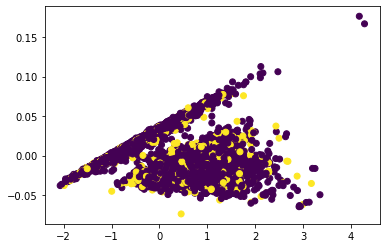

In [176]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(w2v_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

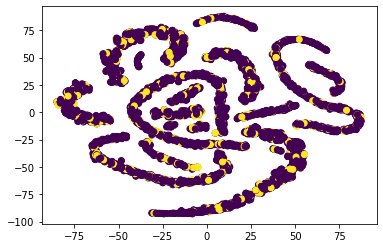

In [177]:

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000)

tsne_data = tsne.fit_transform(w2v_embeddings)

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
tsne_df["labels"] = labels

plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
plt.show()

### Visualization for Pretrained BERT Embeddings

In [178]:
X_train.columns

Index(['text', 'clean_text_Lem', 'text_length_Lem', 'tokenised_sentences',
       'doc_vector', 'doc_vector_pretrained_bert'],
      dtype='object')

In [179]:

pretrained_bert_embeddings = np.array(X_train['doc_vector_pretrained_bert'].tolist())

pretrained_bert_embeddings.shape

(9095, 384)

In [180]:
labels = y_train.apply(lambda x : 1 if x=='Disaster' else 0)

len(labels)

9095

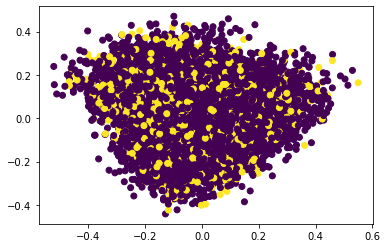

In [181]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_bert_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

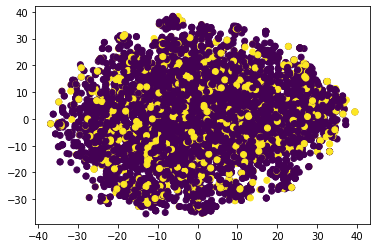

In [182]:

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=300)

tsne_data = tsne.fit_transform(pretrained_bert_embeddings)

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
tsne_df["labels"] = labels

plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
plt.show()